In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN 
import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
# import global_variables as gv

In [4]:
! pip install missingpy
from missingpy import MissForest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49 kB 2.9 MB/s 


In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [6]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [7]:
df = pd.read_csv('gdrive/MyDrive/data/preprocessed-binary_CVD.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,1319-0.0,1408-0.0,1329-0.0,1448-0.0,1538-0.0,6142-0.0,2050-0.0,1508-0.0,1339-0.0,30710-0.0,...,outcome_myocardial_infarction,outcome_cardiomyopathies,outcome_ischemic_heart_disease,outcome_heart_failure,outcome_peripheral_vascular_disease,outcome_cardiac_arrest,outcome_cerebral_infarction,outcome_arrhythmia,CVD,hypertension
0,0.0,1.0,2.0,3.0,2.0,1.0,2.0,3.0,2.0,0.34,...,0,0,0,0,0,0,0,1,1,0
1,0.0,3.0,2.0,-1.0,0.0,1.0,-1.0,2.0,2.0,3.94,...,1,0,1,0,0,0,0,0,0,1
2,0.0,3.0,3.0,2.0,1.0,2.0,1.0,2.0,2.0,0.55,...,0,0,0,0,0,0,0,0,0,0
3,3.0,3.0,3.0,3.0,0.0,2.0,1.0,NaN,2.0,0.45,...,0,0,0,0,0,0,0,0,0,0
4,0.0,3.0,2.0,1.0,0.0,5.0,2.0,2.0,2.0,0.75,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502476,0.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.45,...,0,0,0,0,0,0,0,0,0,0
502477,0.0,1.0,1.0,3.0,2.0,2.0,1.0,1.0,1.0,2.75,...,0,0,1,0,0,0,0,0,0,1
502478,2.0,1.0,1.0,2.0,2.0,-7.0,4.0,2.0,2.0,0.85,...,1,0,1,0,0,1,0,1,1,1
502479,3.0,3.0,1.0,3.0,0.0,1.0,1.0,NaN,2.0,3.57,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.set_option('display.max_columns', None)
df.shape

(502481, 73)

### convert -1/-3/-818 categorical encodings & -10/-1/-3 numerical encodings to NaN

In [8]:
categorical_cols = ['1418','1329','1220','1428','1249','1349','1369','20117','2100','2654','1339','21000','2050','1408','1200','1538','31','6138','1359','1389','1478','2090','1508','1379','6142','1468','1548','1239','1448']
numerical_cols = ['1488','4079','1299','21003','1160','1438','4080','1458','1528','1319','845','1289','1309']
continuous_cols = ['30850','30780','30690','30790','23101','23099','48','23100','30710','30760','30640','30750','49','30770','30740','30630','30870','21001']

categorical_cols = [s + '-0.0' for s in categorical_cols]
numerical_cols = [s + '-0.0' for s in numerical_cols]
continuous_cols = [s + '-0.0' for s in continuous_cols]

In [ ]:
df.head(10)

,1319-0.0,1408-0.0,1329-0.0,1448-0.0,1538-0.0,6142-0.0,2050-0.0,1508-0.0,1339-0.0,30710-0.0,1349-0.0,30750-0.0,1468-0.0,20117-0.0,30740-0.0,1160-0.0,2090-0.0,31-0.0,1488-0.0,30850-0.0,4080-0.0,1369-0.0,21000-0.0,1200-0.0,1289-0.0,30790-0.0,845-0.0,20491-0.0,48-0.0,30630-0.0,1299-0.0,1220-0.0,1548-0.0,1528-0.0,23099-0.0,49-0.0,30690-0.0,1389-0.0,2654-0.0,1249-0.0,1309-0.0,1379-0.0,1239-0.0,21003-0.0,20403-0.0,30780-0.0,1438-0.0,30870-0.0,1359-0.0,30770-0.0,21001-0.0,1458-0.0,23100-0.0,6138-0.0,1418-0.0,1478-0.0,4079-0.0,20414-0.0,30760-0.0,23101-0.0,2100-0.0,1428-0.0,30640-0.0,outcome_myocardial_infarction,outcome_cardiomyopathies,outcome_ischemic_heart_disease,outcome_heart_failure,outcome_peripheral_vascular_disease,outcome_cardiac_arrest,outcome_cerebral_infarction,outcome_arrhythmia,CVD,hypertension
0,0.0,1.0,2.0,3.0,2.0,1.0,2.0,3.0,2.0,0.34,1.0,NaN,NaN,2.0,5.622,7.0,1.0,0.0,6.0,0.508,110.0,1.0,1001.0,3.0,6.0,NaN,NaN,4.0,74.0,1.593,10.0,0.0,2.0,2.0,35.6,102.0,6.477,1.0,NaN,1.0,2.0,1.0,0.0,54.0,2.0,3.888,10.0,0.977,2.0,26.339,24.5790,-10.0,25.0,1.0,3.0,1.0,77.0,4.0,1.706,45.2,1.0,0.0,1.211,0,0,0,0,0,0,0,1,1,0
1,0.0,3.0,2.0,-1.0,0.0,1.0,-1.0,2.0,2.0,3.94,4.0,40.9,5.0,2.0,5.052,9.0,0.0,1.0,2.0,13.088,166.0,2.0,1001.0,2.0,2.0,15.40,16.0,NaN,120.0,1.390,2.0,0.0,2.0,-10.0,36.5,113.0,5.512,1.0,NaN,1.0,1.0,2.0,0.0,65.0,NaN,3.520,12.0,2.358,3.0,10.701,35.0861,7.0,42.9,-7.0,2.0,1.0,91.0,NaN,1.173,74.6,0.0,1.0,1.019,1,0,1,0,0,0,0,0,0,1
2,0.0,3.0,3.0,2.0,1.0,2.0,1.0,2.0,2.0,0.55,1.0,40.0,1.0,0.0,5.310,5.0,0.0,0.0,0.0,0.515,132.0,1.0,1001.0,3.0,2.0,32.10,16.0,NaN,66.0,2.005,4.0,0.0,1.0,1.0,29.5,88.0,7.079,1.0,NaN,3.0,4.0,2.0,0.0,69.0,NaN,4.227,8.0,0.655,2.0,10.693,19.3835,7.0,15.2,3.0,2.0,1.0,67.0,NaN,2.490,36.3,0.0,1.0,1.097,0,0,0,0,0,0,0,0,0,0
3,3.0,3.0,3.0,3.0,0.0,2.0,1.0,NaN,2.0,0.45,2.0,37.3,4.0,2.0,4.449,7.0,0.0,1.0,5.0,4.675,178.0,2.0,1001.0,1.0,3.0,NaN,18.0,NaN,110.0,1.474,2.0,0.0,1.0,2.0,28.5,117.0,5.028,0.0,7.0,NaN,1.0,2.0,1.0,66.0,NaN,3.041,10.0,3.108,2.0,25.317,35.1281,7.0,31.7,3.0,2.0,1.0,84.0,NaN,1.169,79.6,0.0,3.0,0.923,0,0,0,0,0,0,0,0,0,0
4,0.0,3.0,2.0,1.0,0.0,5.0,2.0,2.0,2.0,0.75,2.0,32.2,1.0,2.0,4.616,6.0,0.0,1.0,-10.0,20.162,178.0,1.0,1001.0,3.0,1.0,71.11,NaN,NaN,94.0,2.149,1.0,0.0,2.0,2.0,24.8,100.0,7.958,1.0,7.0,2.0,1.0,1.0,0.0,48.0,NaN,4.983,8.0,1.173,1.0,26.523,25.8866,1.0,20.1,1.0,2.0,1.0,88.0,NaN,2.053,61.0,0.0,3.0,1.443,0,0,0,0,0,0,0,0,0,0
5,0.0,3.0,0.0,3.0,0.0,1.0,1.0,2.0,0.0,0.45,1.0,37.0,5.0,2.0,4.870,5.0,0.0,1.0,1.0,13.825,157.0,1.0,4001.0,3.0,3.0,NaN,18.0,NaN,82.0,1.541,3.0,0.0,2.0,4.0,16.3,100.0,4.633,1.0,2.0,2.0,3.0,1.0,2.0,52.0,NaN,NaN,20.0,0.928,3.0,31.186,25.0180,3.0,12.9,-7.0,1.0,3.0,99.0,NaN,1.369,66.1,0.0,3.0,0.849,0,0,0,0,0,0,0,0,0,0
6,0.0,3.0,2.0,3.0,0.0,1.0,4.0,2.0,2.0,3.94,2.0,37.6,1.0,2.0,5.050,9.0,1.0,1.0,6.0,9.702,135.0,1.0,1001.0,2.0,2.0,6.50,16.0,NaN,127.0,1.200,2.0,0.0,1.0,6.0,36.7,116.0,6.159,2.0,7.0,1.0,3.0,1.0,0.0,49.0,NaN,4.091,26.0,3.786,3.0,23.232,37.4691,2.0,44.6,4.0,2.0,2.0,85.0,NaN,0.922,76.9,1.0,3.0,1.274,0,0,0,0,0,0,0,0,0,0
7,0.0,2.0,1.0,3.0,1.0,1.0,1.0,2.0,2.0,NaN,2.0,84.1,4.0,2.0,NaN,7.0,0.0,1.0,0.0,NaN,135.0,1.0,1001.0,2.0,3.0,NaN,21.0,NaN,112.0,NaN,2.0,0.0,2.0,2.0,29.7,107.0,NaN,2.0,NaN,1.0,1.0,2.0,0.0,55.0,NaN,NaN,10.0,NaN,3.0,NaN,30.7934,7.0,30.3,3.0,2.0,1.0,99.0,NaN,NaN,71.7,0.0,0.0,NaN,0,0,1,0,0,1,1,1,1,1
8,0.0,4.0,1.0,3.0,0.0,-7.0,1.0,2.0,3.0,0.85,3.0,40.2,NaN,2.0,4.855,6.0,1.0,0.0,4.0,0.989,162.0,3.0,1001.0,3.0,1.0,4.10,18.0,NaN,88.0,2.236,-10.0,1.0,2.0,1.0,33.9,107.0,6.549,1.0,8.0,4.0,3.0,1.0,0.0,57.0,NaN,3.631,10.0,0.978,3.0,18.731,27.3967,-10.0,24.4,-7.0,3.0,4.0,91.0,NaN,2.207,47.5,1.0,3.0,1.035,0,0,0,0,0,0,0,0,0,0
9,3.0,3.0,3.0,3.0,0.0,2.0,1.0,3.0,2.0,1.01,3.0,35.5,2.0,2.0,6.057,7.0,0.0,1.0,4.0,10.608,143.0,1.0,1001.0,2.0,3.0,NaN,NaN,4.0,83.0,1.902,3.0,1.0,1.0,1.0,19.0,92.0,5.394,1.0,7.0,1.0,2.0,1.0,0.0,69.0,1.0,3.039,21.0,1.859,2.0,19.802,22.1741,7.0,12.5,1.0,2.0,3.0,72.0,4.0,1.725,53.1,0.0,3.0,0.871,0,0,0,0,0,0,0,0,0,0


In [9]:
def back_to_nan(df, col_list):
    for col in col_list:
        df[col].mask(df[col] < 0, np.nan, inplace=True)

In [10]:
back_to_nan(df,numerical_cols)
back_to_nan(df,categorical_cols)

### removing columns that mainly contain NaN values

In [11]:
def remove_high_nan(df, ratio=0.65):
    dropped_cols = []
    for i in df.columns:
        if df[i].isnull().mean() > ratio:
            df.drop(i,axis=1, inplace=True)
            dropped_cols.append(i)
    return dropped_cols

In [12]:
dropped = remove_high_nan(df)
df2 = df.copy()

In [ ]:
df2.shape

(502481, 70)

In [13]:
dropped

['20491-0.0', '20403-0.0', '20414-0.0']

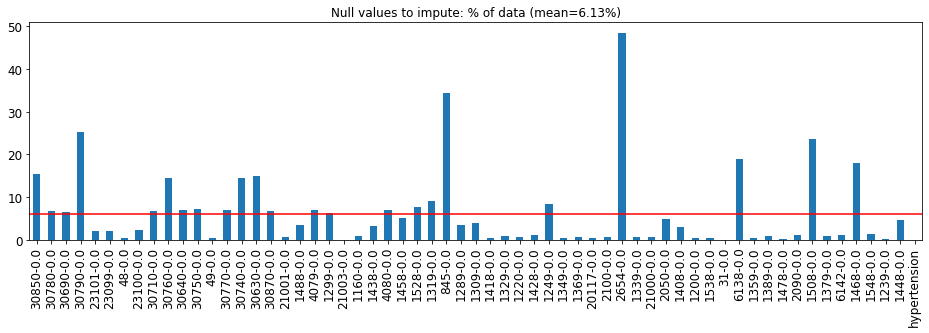

In [ ]:
df2.loc[:,gv.continuous_cols+gv.numerical_cols+gv.categorical_cols].isnull().sum().div(df2.shape[0]).div(0.01).plot(kind='bar', fontsize=12, figsize = (16,4))
plt.title('Null values to impute: % of data (mean=6.13%)')
plt.hlines(6.13, -10, 500, color='red')
# plt.savefig('charts/imputation_percents.png', bbox_inches='tight')

In [ ]:
df2.loc[:,gv.continuous_cols+gv.numerical_cols+gv.categorical_cols].isnull().sum().div(df2.shape[0]).div(0.01).mean()

6.237980474220252

In [ ]:
df2[gv.numerical_cols+gv.continuous_cols+gv.categorical_cols][df2[gv.numerical_cols+gv.continuous_cols+gv.categorical_cols].isna().any(axis=1)]

,1488-0.0,4079-0.0,1299-0.0,21003-0.0,1160-0.0,1438-0.0,4080-0.0,1458-0.0,1528-0.0,1319-0.0,845-0.0,1289-0.0,1309-0.0,30850-0.0,30780-0.0,30690-0.0,30790-0.0,23101-0.0,23099-0.0,48-0.0,23100-0.0,30710-0.0,30760-0.0,30640-0.0,30750-0.0,49-0.0,30770-0.0,30740-0.0,30630-0.0,30870-0.0,21001-0.0,1418-0.0,1329-0.0,1220-0.0,1428-0.0,1249-0.0,1349-0.0,1369-0.0,20117-0.0,2100-0.0,2654-0.0,1339-0.0,21000-0.0,2050-0.0,1408-0.0,1200-0.0,1538-0.0,31-0.0,6138-0.0,1359-0.0,1389-0.0,1478-0.0,2090-0.0,1508-0.0,1379-0.0,6142-0.0,1468-0.0,1548-0.0,1239-0.0,1448-0.0,hypertension
0,6.0,77.0,10.0,54.0,7.0,10.0,110.0,NaN,2.0,0.0,NaN,6.0,2.0,0.508,3.888,6.477,NaN,45.2,35.6,74.0,25.0,0.34,1.706,1.211,NaN,102.0,26.339,5.622,1.593,0.977,24.5790,3.0,2.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,NaN,2.0,1001.0,2.0,1.0,3.0,2.0,0.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0,NaN,2.0,0.0,3.0,0
1,2.0,91.0,2.0,65.0,9.0,12.0,166.0,7.0,NaN,0.0,16.0,2.0,1.0,13.088,3.520,5.512,15.40,74.6,36.5,120.0,42.9,3.94,1.173,1.019,40.9,113.0,10.701,5.052,1.390,2.358,35.0861,2.0,2.0,0.0,1.0,1.0,4.0,2.0,2.0,0.0,NaN,2.0,1001.0,NaN,3.0,2.0,0.0,1.0,NaN,3.0,1.0,1.0,0.0,2.0,2.0,1.0,5.0,2.0,0.0,NaN,1
2,0.0,67.0,4.0,69.0,5.0,8.0,132.0,7.0,1.0,0.0,16.0,2.0,4.0,0.515,4.227,7.079,32.10,36.3,29.5,66.0,15.2,0.55,2.490,1.097,40.0,88.0,10.693,5.310,2.005,0.655,19.3835,2.0,3.0,0.0,1.0,3.0,1.0,1.0,0.0,0.0,NaN,2.0,1001.0,1.0,3.0,3.0,1.0,0.0,3.0,2.0,1.0,1.0,0.0,2.0,2.0,2.0,1.0,1.0,0.0,2.0,0
3,5.0,84.0,2.0,66.0,7.0,10.0,178.0,7.0,2.0,3.0,18.0,3.0,1.0,4.675,3.041,5.028,NaN,79.6,28.5,110.0,31.7,0.45,1.169,0.923,37.3,117.0,25.317,4.449,1.474,3.108,35.1281,2.0,3.0,0.0,3.0,NaN,2.0,2.0,2.0,0.0,7.0,2.0,1001.0,1.0,3.0,1.0,0.0,1.0,3.0,2.0,0.0,1.0,0.0,NaN,2.0,2.0,4.0,1.0,1.0,3.0,0
4,NaN,88.0,1.0,48.0,6.0,8.0,178.0,1.0,2.0,0.0,NaN,1.0,1.0,20.162,4.983,7.958,71.11,61.0,24.8,94.0,20.1,0.75,2.053,1.443,32.2,100.0,26.523,4.616,2.149,1.173,25.8866,2.0,2.0,0.0,3.0,2.0,2.0,1.0,2.0,0.0,7.0,2.0,1001.0,2.0,3.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0,5.0,1.0,2.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502476,0.0,91.0,0.0,63.0,7.0,4.0,147.0,7.0,0.0,0.0,16.0,2.0,2.0,17.137,3.843,5.754,5.30,80.7,27.0,110.0,29.8,1.45,1.026,1.137,28.0,113.0,20.777,4.509,1.345,3.820,30.6094,1.0,1.0,0.0,3.0,1.0,3.0,1.0,2.0,0.0,4.0,2.0,1001.0,1.0,3.0,2.0,2.0,1.0,NaN,2.0,1.0,3.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,0
502477,0.0,73.0,3.0,64.0,6.0,4.0,148.0,7.0,3.0,0.0,16.0,4.0,6.0,0.725,2.863,4.664,5.09,44.9,46.3,102.0,38.7,2.75,1.159,0.898,33.2,110.0,23.647,5.673,1.365,2.134,31.4652,3.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,0.0,NaN,1.0,1001.0,1.0,1.0,3.0,2.0,0.0,3.0,3.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,3.0,0.0,3.0,1
502478,20.0,81.0,2.0,43.0,7.0,20.0,133.0,10.0,1.0,2.0,NaN,2.0,2.0,12.040,3.358,5.184,NaN,68.1,25.7,99.0,23.6,0.85,1.043,0.985,31.5,98.0,22.507,4.851,1.241,2.547,28.6196,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,1.0,NaN,2.0,1001.0,4.0,1.0,2.0,2.0,1.0,NaN,3.0,1.0,1.0,1.0,2.0,2.0,NaN,3.0,3.0,0.0,2.0,1
502479,4.0,83.0,2.0,56.0,6.0,12.0,138.0,7.0,2.0,3.0,NaN,4.0,1.0,NaN,4.200,6.827,27.48,46.4,41.3,86.0,32.7,3.57,1.589,1.063,45.7,111.0,30.498,5.506,1.669,2.090,27.3702,2.0,1.0,0.0,0.0,4.0,2.0,1.0,2.0,0.0,NaN,2.0,1001.0,1.0,3.0,3.0,0.0,0.0,1.0,3.0,1.0,1.0,0.0,NaN,1.0,1.0,1.0,2.0,0.0,3.0,0


In [ ]:
df2.shape

(101729, 69)

### implement MissForest imputation (random forest regressor/classifier)

In [14]:
cat_indices = [] 
for i in range(len(categorical_cols)):
    index = df2.columns.get_loc(categorical_cols[i])
    cat_indices.append(index)

In [16]:
imputer = MissForest(max_iter=5)
X_train = imputer.fit_transform(df2.loc[:,:'30640-0.0'], cat_vars=cat_indices)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: 

Iteration: 0


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: 

Iteration: 1


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: 

Iteration: 2


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: 

Iteration: 3


In [19]:
df_X_trained = pd.DataFrame(X_train, columns=df2.columns.tolist()[:-10])

In [18]:
print(len(df2.loc[:,:'30640-0.0'].columns.tolist()))

['1319-0.0',
 '1408-0.0',
 '1329-0.0',
 '1448-0.0',
 '1538-0.0',
 '6142-0.0',
 '2050-0.0',
 '1508-0.0',
 '1339-0.0',
 '30710-0.0',
 '1349-0.0',
 '30750-0.0',
 '1468-0.0',
 '20117-0.0',
 '30740-0.0',
 '1160-0.0',
 '2090-0.0',
 '31-0.0',
 '1488-0.0',
 '30850-0.0',
 '4080-0.0',
 '1369-0.0',
 '21000-0.0',
 '1200-0.0',
 '1289-0.0',
 '30790-0.0',
 '845-0.0',
 '48-0.0',
 '30630-0.0',
 '1299-0.0',
 '1220-0.0',
 '1548-0.0',
 '1528-0.0',
 '23099-0.0',
 '49-0.0',
 '30690-0.0',
 '1389-0.0',
 '2654-0.0',
 '1249-0.0',
 '1309-0.0',
 '1379-0.0',
 '1239-0.0',
 '21003-0.0',
 '30780-0.0',
 '1438-0.0',
 '30870-0.0',
 '1359-0.0',
 '30770-0.0',
 '21001-0.0',
 '1458-0.0',
 '23100-0.0',
 '6138-0.0',
 '1418-0.0',
 '1478-0.0',
 '4079-0.0',
 '30760-0.0',
 '23101-0.0',
 '2100-0.0',
 '1428-0.0',
 '30640-0.0']

In [ ]:
df2.columns.tolist()[:-10]

In [20]:
df_X_trained

,1319-0.0,1408-0.0,1329-0.0,1448-0.0,1538-0.0,6142-0.0,2050-0.0,1508-0.0,1339-0.0,30710-0.0,...,23100-0.0,6138-0.0,1418-0.0,1478-0.0,4079-0.0,30760-0.0,23101-0.0,2100-0.0,1428-0.0,30640-0.0
0,0.0,1.0,2.0,3.0,2.0,1.0,2.0,3.0,2.0,0.3400,...,25.0,1.0,3.0,1.0,77.0,1.70600,45.2,1.0,0.0,1.21100
1,0.0,3.0,2.0,1.0,0.0,1.0,1.0,2.0,2.0,3.9400,...,42.9,3.0,2.0,1.0,91.0,1.17300,74.6,0.0,1.0,1.01900
2,0.0,3.0,3.0,2.0,1.0,2.0,1.0,2.0,2.0,0.5500,...,15.2,3.0,2.0,1.0,67.0,2.49000,36.3,0.0,1.0,1.09700
3,3.0,3.0,3.0,3.0,0.0,2.0,1.0,2.0,2.0,0.4500,...,31.7,3.0,2.0,1.0,84.0,1.16900,79.6,0.0,3.0,0.92300
4,0.0,3.0,2.0,1.0,0.0,5.0,2.0,2.0,2.0,0.7500,...,20.1,1.0,2.0,1.0,88.0,2.05300,61.0,0.0,3.0,1.44300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502476,0.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.4500,...,29.8,3.0,1.0,3.0,91.0,1.02600,80.7,0.0,3.0,1.13700
502477,0.0,1.0,1.0,3.0,2.0,2.0,1.0,1.0,1.0,2.7500,...,38.7,3.0,3.0,2.0,73.0,1.15900,44.9,0.0,1.0,0.89800
502478,2.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,0.8500,...,23.6,1.0,1.0,1.0,81.0,1.04300,68.1,1.0,1.0,0.98500
502479,3.0,3.0,1.0,3.0,0.0,1.0,1.0,2.0,2.0,3.5700,...,32.7,1.0,2.0,1.0,83.0,1.58900,46.4,0.0,0.0,1.06300


In [21]:
# add imputed values as columns to the untouched dataset
df2.loc[:,:'30640-0.0'] = df_X_trained

In [22]:
df2.isna().sum()

1319-0.0                       0
1408-0.0                       0
1329-0.0                       0
1448-0.0                       0
1538-0.0                       0
                              ..
outcome_cardiac_arrest         0
outcome_cerebral_infarction    0
outcome_arrhythmia             0
CVD                            0
hypertension                   0
Length: 70, dtype: int64

In [23]:
df2

,1319-0.0,1408-0.0,1329-0.0,1448-0.0,1538-0.0,6142-0.0,2050-0.0,1508-0.0,1339-0.0,30710-0.0,...,outcome_myocardial_infarction,outcome_cardiomyopathies,outcome_ischemic_heart_disease,outcome_heart_failure,outcome_peripheral_vascular_disease,outcome_cardiac_arrest,outcome_cerebral_infarction,outcome_arrhythmia,CVD,hypertension
0,0.0,1.0,2.0,3.0,2.0,1.0,2.0,3.0,2.0,0.3400,...,0,0,0,0,0,0,0,1,1,0
1,0.0,3.0,2.0,1.0,0.0,1.0,1.0,2.0,2.0,3.9400,...,1,0,1,0,0,0,0,0,0,1
2,0.0,3.0,3.0,2.0,1.0,2.0,1.0,2.0,2.0,0.5500,...,0,0,0,0,0,0,0,0,0,0
3,3.0,3.0,3.0,3.0,0.0,2.0,1.0,2.0,2.0,0.4500,...,0,0,0,0,0,0,0,0,0,0
4,0.0,3.0,2.0,1.0,0.0,5.0,2.0,2.0,2.0,0.7500,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502476,0.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.4500,...,0,0,0,0,0,0,0,0,0,0
502477,0.0,1.0,1.0,3.0,2.0,2.0,1.0,1.0,1.0,2.7500,...,0,0,1,0,0,0,0,0,0,1
502478,2.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,0.8500,...,1,0,1,0,0,1,0,1,1,1
502479,3.0,3.0,1.0,3.0,0.0,1.0,1.0,2.0,2.0,3.5700,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df2.to_csv('entire_imputed.csv')

In [ ]:
df = pd.read_csv('imputed_ukb46359.csv')

In [ ]:
df.size

2165170

In [ ]:
df = df.iloc[:,1:]
df.head()

,30850-0.0,30780-0.0,30690-0.0,1488-0.0,30790-0.0,1418-0.0,1329-0.0,4079-0.0,1220-0.0,23101-0.0,1428-0.0,1249-0.0,1349-0.0,23099-0.0,48-0.0,1369-0.0,23100-0.0,20117-0.0,1299-0.0,2100-0.0,21003-0.0,30710-0.0,1160-0.0,30760-0.0,1438-0.0,2654-0.0,4080-0.0,30640-0.0,1339-0.0,30750-0.0,21000-0.0,2050-0.0,1408-0.0,49-0.0,1200-0.0,30770-0.0,1538-0.0,1458-0.0,31-0.0,1528-0.0,1319-0.0,30740-0.0,6138-0.0,1359-0.0,1389-0.0,1478-0.0,2090-0.0,1508-0.0,845-0.0,1379-0.0,6142-0.0,1468-0.0,1289-0.0,1548-0.0,30630-0.0,30870-0.0,1239-0.0,21001-0.0,1309-0.0,1448-0.0,outcome_myocardial_infarction,outcome_cardiomyopathies,outcome_ischemic_heart_disease,outcome_heart_failure,outcome_hypertension,outcome_peripheral_vascular_disease,outcome_cardiac_arrest,outcome_cerebral_infarction,outcome_arrhythmia
0,-1.279446,0.552978,0.856104,0.772987,0.160138,3.0,2.0,-0.492958,0.0,-0.947164,0.0,1.0,1.0,0.483027,-1.545793,1.0,-0.138009,2.0,3.546199,1.0,-0.948313,-0.555101,-0.139039,0.933693,-0.377692,6.0,-1.665131,0.850258,2.0,-0.362231,1001.0,2.0,1.0,-0.312803,3.0,0.981135,2.0,-0.255880,0.0,-0.343536,-0.449755,0.177819,1.0,2.0,1.0,1.0,1.0,3.0,5.996074,1.0,1.0,3.0,1.565603,2.0,0.403095,-0.842728,0.0,-0.788176,-0.168110,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.868954,0.158768,0.079159,-0.539868,-0.613795,2.0,2.0,0.775257,0.0,1.556107,1.0,1.0,4.0,0.588425,1.771461,2.0,1.617787,2.0,-0.084622,0.0,0.652782,0.157478,1.470442,-0.491565,-0.154516,7.0,1.106447,0.080170,2.0,0.319113,1001.0,1.0,3.0,0.796999,2.0,-1.715852,0.0,0.827023,1.0,-0.117632,-0.449755,-0.173128,3.0,3.0,1.0,1.0,0.0,2.0,-0.172754,2.0,1.0,5.0,-0.425927,2.0,-0.356404,0.428763,0.0,1.257227,-0.753584,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.567810,-0.354348,-0.310521,0.444774,-0.070011,2.0,3.0,0.141149,0.0,1.981834,3.0,4.0,2.0,-0.348442,1.050319,2.0,0.519189,2.0,-0.084622,0.0,0.798336,-0.533328,-0.139039,-0.502261,-0.377692,7.0,1.700356,-0.304873,2.0,-0.096834,1001.0,1.0,3.0,1.200563,1.0,0.804877,0.0,0.827023,1.0,-0.343536,1.096772,-0.544393,3.0,2.0,0.0,1.0,0.0,2.0,0.685816,2.0,2.0,4.0,0.071956,1.0,-0.042128,1.119290,1.0,1.265403,-0.753584,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.541023,0.331835,0.296342,-1.196296,-0.297654,2.0,1.0,1.499951,0.0,1.309186,0.0,1.0,2.0,-0.207912,1.194547,1.0,0.381864,2.0,-0.084622,0.0,-0.802759,-0.090479,-0.139039,0.007462,-0.377692,7.0,-0.427819,0.328844,2.0,5.310474,1001.0,1.0,2.0,0.191652,2.0,-0.231662,1.0,0.827023,1.0,-0.343536,-0.449755,5.453302,3.0,3.0,2.0,1.0,0.0,2.0,1.973672,2.0,1.0,4.0,0.071956,2.0,0.277348,0.334732,0.0,0.421573,-0.753584,3.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
4,-1.060849,-0.519316,0.121831,-1.196296,-0.146259,2.0,2.0,-1.036478,0.0,-1.372890,0.0,4.0,1.0,-0.196202,-2.050592,2.0,-0.922722,2.0,1.276936,0.0,-1.676084,-0.450193,0.665702,2.027372,0.068661,7.0,-1.368176,-0.758102,2.0,-0.200820,1002.0,1.0,2.0,-1.422604,1.0,1.900884,2.0,0.095332,0.0,0.108272,0.065754,-0.311660,6.0,2.0,2.0,1.0,0.0,2.0,0.685816,2.0,1.0,3.0,1.067720,2.0,1.518025,-0.677001,0.0,-1.532064,-0.753584,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
